<a href="https://colab.research.google.com/github/sanjivyash/SHALA2020/blob/master/YashSanjeev_DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%tensorflow_version 2.x

import os
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, datasets

In [0]:
print(tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.2.0
Found GPU at: /device:GPU:0


In [0]:
import numpy as np
import cv2 as cv
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# MNIST Dataset

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
print(X_train[0].shape, X_test[0].shape)
print(type(X_train[0]))

(28, 28) (28, 28)
<class 'numpy.ndarray'>


In [0]:
X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
np.random.seed(seed=69)
permutation = np.random.permutation(len(X_train))

X_valid = X_train[:500]
X_train = X_train[500:]

y_valid = y_train[:500]
y_train = y_train[500:]

In [0]:
lenet = models.Sequential()

lenet.add(layers.Conv2D(filters=6 ,kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
lenet.add(layers.AvgPool2D())

lenet.add(layers.Conv2D(filters=16 ,kernel_size=(5,5), padding='valid', activation='relu'))
lenet.add(layers.AvgPool2D())

lenet.add(layers.Flatten())
lenet.add(layers.Dense(120, activation='relu'))
lenet.add(layers.Dense(84, activation='relu'))
lenet.add(layers.Dense(10, activation='softmax'))

x = np.random.randn(1,28,28,1)
lenet.predict(x).shape

(1, 10)

In [0]:
lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lenet.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_valid, y_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/5
59500/59500 [==============================] - 7s 111us/step - loss: 0.3341 - accuracy: 0.8954 - val_loss: 0.1261 - val_accuracy: 0.9580
Epoch 2/5
59500/59500 [==============================] - 6s 107us/step - loss: 0.0989 - accuracy: 0.9692 - val_loss: 0.0905 - val_accuracy: 0.9720
Epoch 3/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.0683 - accuracy: 0.9780 - val_loss: 0.0997 - val_accuracy: 0.9720
Epoch 4/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0564 - val_accuracy: 0.9840
Epoch 5/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0700 - val_accuracy: 0.9840


In [0]:
lenet.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 81us/step


[0.03755041592342313, 0.9883000254631042]

## Evaluation Info

*   **Model :** LeNet5
*   **Training Accuracy :** 98.69%
*   **Validation Accuracy :** 98.40%
*   **Test Accuracy :** 98.83%



# Fashion MNIST Dataset

## Dataset Without Augmentation

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
np.random.seed(seed=69)
permutation = np.random.permutation(len(X_train))

X_valid = X_train[:500]
X_train = X_train[500:]

y_valid = y_train[:500]
y_train = y_train[500:]

In [0]:
lenet = models.Sequential()

lenet.add(layers.Conv2D(filters=6 ,kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
lenet.add(layers.AvgPool2D())

lenet.add(layers.Conv2D(filters=16 ,kernel_size=(5,5), padding='valid', activation='relu'))
lenet.add(layers.AvgPool2D())

lenet.add(layers.Flatten())
lenet.add(layers.Dense(120, activation='relu'))
lenet.add(layers.Dense(84, activation='relu'))
lenet.add(layers.Dense(10, activation='softmax'))

x = np.random.randn(1,28,28,1)
lenet.predict(x).shape

(1, 10)

In [0]:
lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Fit = lenet.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_valid, y_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/10
59500/59500 [==============================] - 7s 111us/step - loss: 0.6263 - accuracy: 0.7674 - val_loss: 0.4284 - val_accuracy: 0.8640
Epoch 2/10
59500/59500 [==============================] - 6s 107us/step - loss: 0.4267 - accuracy: 0.8429 - val_loss: 0.3650 - val_accuracy: 0.8820
Epoch 3/10
59500/59500 [==============================] - 6s 108us/step - loss: 0.3772 - accuracy: 0.8616 - val_loss: 0.3135 - val_accuracy: 0.8960
Epoch 4/10
59500/59500 [==============================] - 7s 116us/step - loss: 0.3455 - accuracy: 0.8727 - val_loss: 0.3032 - val_accuracy: 0.8880
Epoch 5/10
59500/59500 [==============================] - 7s 111us/step - loss: 0.3215 - accuracy: 0.8820 - val_loss: 0.2713 - val_accuracy: 0.8920
Epoch 6/10
59500/59500 [==============================] - 6s 107us/step - loss: 0.3055 - accuracy: 0.8855 - val_loss: 0.2666 - val_accuracy: 0.9000
Epoch 7/10
59500/59500 [==============================] - 6s 108

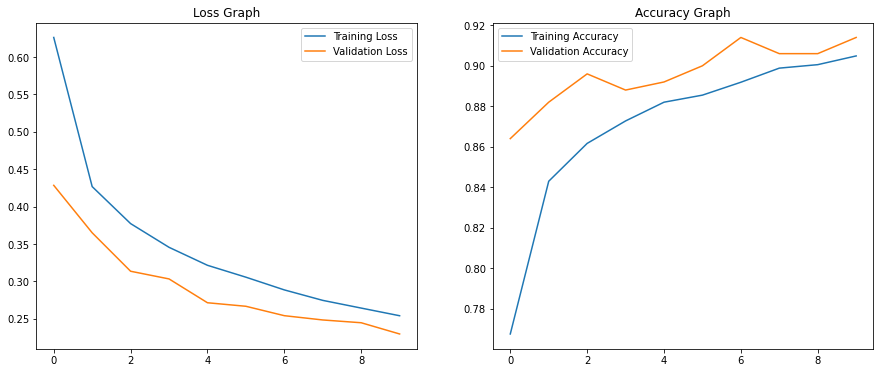

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.set_title('Loss Graph')
ax1.plot(Fit.history['loss'], label='Training Loss')
ax1.plot(Fit.history['val_loss'], label='Validation Loss')
ax1.legend()

ax2.set_title('Accuracy Graph')
ax2.plot(Fit.history['accuracy'], label='Training Accuracy')
ax2.plot(Fit.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.show()

In [0]:
Fit2 = lenet.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_valid, y_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.2430 - accuracy: 0.9100 - val_loss: 0.2165 - val_accuracy: 0.9160
Epoch 2/5
59500/59500 [==============================] - 6s 107us/step - loss: 0.2363 - accuracy: 0.9103 - val_loss: 0.2222 - val_accuracy: 0.9220
Epoch 3/5
59500/59500 [==============================] - 6s 107us/step - loss: 0.2277 - accuracy: 0.9143 - val_loss: 0.2069 - val_accuracy: 0.9220
Epoch 4/5
59500/59500 [==============================] - 6s 107us/step - loss: 0.2180 - accuracy: 0.9172 - val_loss: 0.2060 - val_accuracy: 0.9160
Epoch 5/5
59500/59500 [==============================] - 6s 107us/step - loss: 0.2114 - accuracy: 0.9205 - val_loss: 0.2045 - val_accuracy: 0.9160


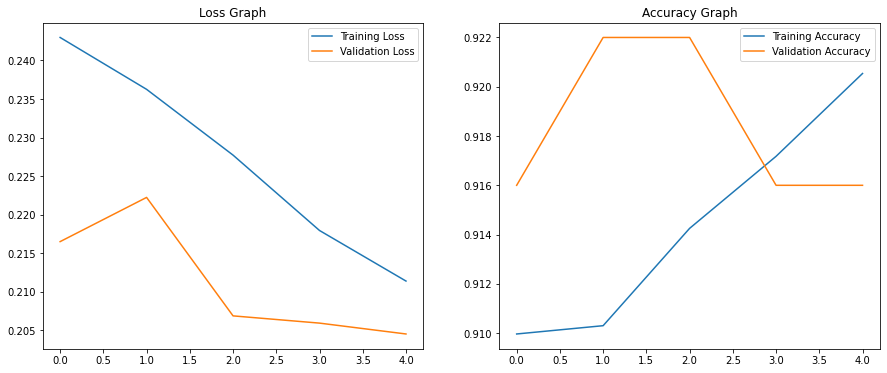

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.set_title('Loss Graph')
ax1.plot(Fit2.history['loss'], label='Training Loss')
ax1.plot(Fit2.history['val_loss'], label='Validation Loss')
ax1.legend()

ax2.set_title('Accuracy Graph')
ax2.plot(Fit2.history['accuracy'], label='Training Accuracy')
ax2.plot(Fit2.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.show()

In [0]:
Fit3 = lenet.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_valid, y_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.2026 - accuracy: 0.9228 - val_loss: 0.2258 - val_accuracy: 0.9180
Epoch 2/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.1984 - accuracy: 0.9250 - val_loss: 0.2008 - val_accuracy: 0.9160
Epoch 3/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.1910 - accuracy: 0.9280 - val_loss: 0.1975 - val_accuracy: 0.9240
Epoch 4/5
59500/59500 [==============================] - 6s 107us/step - loss: 0.1852 - accuracy: 0.9304 - val_loss: 0.2201 - val_accuracy: 0.9220
Epoch 5/5
59500/59500 [==============================] - 6s 108us/step - loss: 0.1817 - accuracy: 0.9312 - val_loss: 0.1984 - val_accuracy: 0.9120


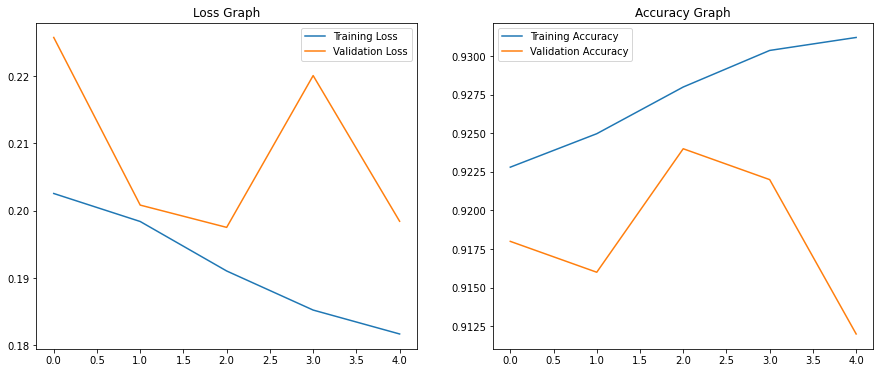

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.set_title('Loss Graph')
ax1.plot(Fit3.history['loss'], label='Training Loss')
ax1.plot(Fit3.history['val_loss'], label='Validation Loss')
ax1.legend()

ax2.set_title('Accuracy Graph')
ax2.plot(Fit3.history['accuracy'], label='Training Accuracy')
ax2.plot(Fit3.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.show()

In [0]:
lenet.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 84us/step


[0.2835498652935028, 0.9038000106811523]

## Evaluation Info

*   **Model :** LeNet5
*   **Training Accuracy :** 93.12%
*   **Validation Accuracy :** 91.20%
*   **Test Accuracy :** 90.38%

## Augmented Dataset

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(        
            width_shift_range=0.1,      
            height_shift_range=0.1,   
            shear_range=0.1,            
            zoom_range=0.2,             
            horizontal_flip=True,       
            fill_mode='nearest'
        )

In [0]:
np.random.seed(seed=69)
permutation = np.random.permutation(len(X_train))

X_valid = X_train[:2000]
X_train = X_train[2000:]

y_valid = y_train[:2000]
y_train = y_train[2000:]

In [0]:
lenet = models.Sequential()

lenet.add(layers.Conv2D(filters=6 ,kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
lenet.add(layers.AvgPool2D())

lenet.add(layers.Conv2D(filters=16 ,kernel_size=(5,5), padding='valid', activation='relu'))
lenet.add(layers.AvgPool2D())

lenet.add(layers.Flatten())
lenet.add(layers.Dense(120, activation='relu'))
lenet.add(layers.Dense(84, activation='relu'))
lenet.add(layers.Dense(10, activation='softmax'))

lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model_save = ModelCheckpoint('/content/mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

Fit = lenet.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=100, callbacks=[early_stopping, model_save, reduce], validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/100
907/907 [==============================] - 23s 26ms/step - loss: 0.8631 - accuracy: 0.6673 - val_loss: 0.5750 - val_accuracy: 0.7585
Epoch 2/100
907/907 [==============================] - 23s 25ms/step - loss: 0.6464 - accuracy: 0.7506 - val_loss: 0.4717 - val_accuracy: 0.8300
Epoch 3/100
907/907 [==============================] - 23s 26ms/step - loss: 0.5890 - accuracy: 0.7721 - val_loss: 0.4540 - val_accuracy: 0.8290
Epoch 4/100
907/907 [==============================] - 23s 26ms/step - loss: 0.5480 - accuracy: 0.7869 - val_loss: 0.4240 - val_accuracy: 0.8415
Epoch 5/100
907/907 [==============================] - 23s 25ms/step - loss: 0.5201 - accuracy: 0.8000 - val_loss: 0.4158 - val_accuracy: 0.8330
Epoch 6/100
907/907 [==============================] - 23s 26ms/step - loss: 0.4923 - accuracy: 0.8104 - val_loss: 0.3799 - val_accuracy: 0.8625
Epoch 7/100
907/907 [==============================] - 23s 25ms/step - loss: 0.4770 - accuracy: 0.8158 - val_loss: 0.3825 - val_ac

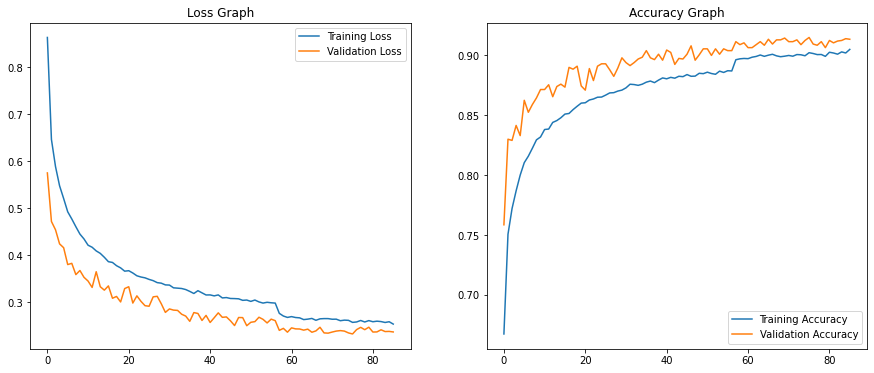

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.set_title('Loss Graph')
ax1.plot(Fit.history['loss'], label='Training Loss')
ax1.plot(Fit.history['val_loss'], label='Validation Loss')
ax1.legend()

ax2.set_title('Accuracy Graph')
ax2.plot(Fit.history['accuracy'], label='Training Accuracy')
ax2.plot(Fit.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.show()

In [0]:
from keras.models import load_model
model = load_model('/content/mdl_wts.hdf5')

In [0]:
print('Test Accuracy : ', lenet.evaluate(X_test, y_test)[1])
print('Train Accuracy : ', lenet.evaluate(X_train, y_train)[1])
print('Validation Accuracy : ', lenet.evaluate(X_valid, y_valid)[1])

10000/10000 [==============================] - 1s 80us/step
Test Accuracy :  0.9090999960899353
58000/58000 [==============================] - 5s 80us/step
Train Accuracy :  0.9227069020271301
2000/2000 [==============================] - 0s 86us/step
Validation Accuracy :  0.9135000109672546


## Evaluation Info

*   **Model :** LeNet5
*   **Training Accuracy :** 92.27%
*   **Validation Accuracy :** 91.35%
*   **Test Accuracy :** 90.91%

# Personal Thoughts
I expected the result to go down after data augmentation, which is not what you'd expect norrmally. But MNIST and Fashion MNIST datasets are quite well-behaved in the context that images of the same class have almost the same size and orientation distribution. Hence data augmentation would only introduce unnecessary randomness in the training data which is not reflected in the validation or test data.

This can also be inferred from the fact that the validation accuracy remained higher than train accuracy, which isn't what you exoect but fits perfectly if you take my previous deductions into consideration.

**Alternative :** I believe regularisation should do much better on simple datasets like this one. Dropout regularisation has been depicted below.

## Dropout Approach

In [0]:
from tqdm import tqdm
for i in tqdm(range(10000)):
    pass

100%|██████████| 10000/10000 [00:00<00:00, 1159063.75it/s]
